In [ ]:
%pip install wfdb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import wfdb
record = wfdb.rdrecord('100', pn_dir='mitdb')  # ejemplo con el registro 100
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

In [4]:
print(record.__dict__)

{'record_name': '100', 'n_sig': 2, 'fs': 360, 'counter_freq': None, 'base_counter': None, 'sig_len': 650000, 'base_time': None, 'base_date': None, 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'], 'sig_name': ['MLII', 'V5'], 'p_signal': array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]], shape=(650000, 2)), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['100.dat', '100.dat'], 'fmt': ['212', '212'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [200.0, 200.0], 'baseline': [1024, 1024], 'units': ['mV', 'mV'], 'adc_res': [11, 11], 'adc_zero': [1024, 1024], 'init_value': [995, 1011], 'checksum': [-22131, 20052], 'block_size': [0, 0]}


In [5]:
print(annotation.__dict__)

{'record_name': '100', 'extension': 'atr', 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991], shape=(2274,)), 'symbol': ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [ ]:
import pandas as pd

# Mostrar información básica del registro
print(f"Nombre del registro: {record.record_name}")
print(f"Señales disponibles: {record.sig_name}")
print(f"Frecuencia de muestreo: {record.fs} Hz")
print(f"Duración (segundos): {record.sig_len / record.fs}")

# Mostrar las primeras filas de las señales

df_signals = pd.DataFrame(record.p_signal, columns=record.sig_name)
display(df_signals.head())

# Mostrar las primeras anotaciones
# Diccionario de descripciones comunes de símbolos de anotación
ann_label = {
    'N': 'Latido normal',
    'L': 'Latido de bloqueo de rama izquierda',
    'R': 'Latido de bloqueo de rama derecha',
    'V': 'Latido ventricular prematuro',
    'A': 'Latido auricular prematuro',
    'F': 'Latido de fusión',
    '/': 'Latido de fusión ventricular',
    'f': 'Latido de fusión auricular',
    'j': 'Latido de escape nodal',
    'E': 'Latido de escape ventricular',
    'a': 'Latido auricular aberrante',
    'J': 'Latido de escape de la unión',
    'S': 'Latido de marcapasos',
    'e': 'Latido ventricular aberrante',
    'Q': 'Latido desconocido',
}

descripcion = [ann_label.get(s, 'Desconocido') for s in annotation.symbol]

ann_df = pd.DataFrame({
    'Sample': annotation.sample,
    'Símbolo': annotation.symbol,
    'Descripción': descripcion
})


Nombre del registro: 100
Señales disponibles: ['MLII', 'V5']
Frecuencia de muestreo: 360 Hz
Duración (segundos): 1805.5555555555557


,MLII,V5
0,-0.145,-0.065
1,-0.145,-0.065
2,-0.145,-0.065
3,-0.145,-0.065
4,-0.145,-0.065


,Sample,Símbolo,Descripción
0,18,+,Desconocido
1,77,N,Latido normal
2,370,N,Latido normal
3,662,N,Latido normal
4,946,N,Latido normal


In [14]:
df_signals.columns

Index(['MLII', 'V5'], dtype='object')

In [ ]:
display(ann_df.head())

In [12]:
ann_df

,Sample,Símbolo,Descripción
0,18,+,Desconocido
1,77,N,Latido normal
2,370,N,Latido normal
3,662,N,Latido normal
4,946,N,Latido normal
...,...,...,...
2269,648978,N,Latido normal
2270,649232,N,Latido normal
2271,649484,N,Latido normal
2272,649734,N,Latido normal


In [13]:
ann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sample       2274 non-null   int64 
 1   Símbolo      2274 non-null   object
 2   Descripción  2274 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.4+ KB


In [15]:
minimos = df_signals.min()
print(minimos)


MLII   -2.715
V5     -2.465
dtype: float64


In [16]:
maximos = df_signals.max()
print(maximos)

MLII    1.435
V5      1.225
dtype: float64


In [19]:
import os

# Ruta a la carpeta donde están los registros MIT-BIH (ajusta según tu entorno)
mitbih_dir = 'mit-bih'

# Listar todos los archivos .dat (cada registro tiene .dat, .hea, .atr)
registros = [f[:-4] for f in os.listdir(mitbih_dir) if f.endswith('.dat')]

print(f"Registros encontrados: {registros}")

# Procesar cada registro
for nombre in registros:
    record_path = os.path.join(mitbih_dir, nombre)
    recordtotal = wfdb.rdrecord(record_path, sampfrom=0, channels=None, physical=True)
    annotationtotal = wfdb.rdann(record_path, 'atr')
    print(f"Procesado: {nombre} - Señales: {recordtotal.sig_name} - Anotaciones: {len(annotationtotal.sample)}")

Registros encontrados: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
Procesado: 100 - Señales: ['MLII', 'V5'] - Anotaciones: 2274
Procesado: 101 - Señales: ['MLII', 'V1'] - Anotaciones: 1874
Procesado: 102 - Señales: ['V5', 'V2'] - Anotaciones: 2192
Procesado: 103 - Señales: ['MLII', 'V2'] - Anotaciones: 2091
Procesado: 104 - Señales: ['V5', 'V2'] - Anotaciones: 2311
Procesado: 105 - Señales: ['MLII', 'V1'] - Anotaciones: 2691
Procesado: 106 - Señales: ['MLII', 'V1'] - Anotaciones: 2098
Procesado: 107 - Señales: ['MLII', 'V1'] - Anotaciones: 2140
Procesado: 108 - Señales: ['MLII', 'V1'] - Anotaciones: 1824
Procesado: 109 - Señales: ['MLII', 'V1'] - Anotaciones: 2535
Procesado: 111 - Señales: ['MLII',

In [20]:
print("Mínimos de cada señal:")
print(minimos)
print("\nMáximos de cada señal:")
print(maximos)

Mínimos de cada señal:
MLII   -2.715
V5     -2.465
dtype: float64

Máximos de cada señal:
MLII    1.435
V5      1.225
dtype: float64


In [21]:
recordtotal

In [22]:
# Crear una lista para almacenar la información de cada registro
registros_info = []

for nombre in registros:
    record_path = os.path.join(mitbih_dir, nombre)
    recordtotal = wfdb.rdrecord(record_path, sampfrom=0, channels=None, physical=True)
    annotationtotal = wfdb.rdann(record_path, 'atr')
    registros_info.append({
        'registro': nombre,
        'senales': recordtotal.sig_name,
        'num_anotaciones': len(annotationtotal.sample)
    })

# Convertir la lista a un DataFrame
df_registros = pd.DataFrame(registros_info)
display(df_registros)

,registro,senales,num_anotaciones
0,100,"[MLII, V5]",2274
1,101,"[MLII, V1]",1874
2,102,"[V5, V2]",2192
3,103,"[MLII, V2]",2091
4,104,"[V5, V2]",2311
5,105,"[MLII, V1]",2691
6,106,"[MLII, V1]",2098
7,107,"[MLII, V1]",2140
8,108,"[MLII, V1]",1824
9,109,"[MLII, V1]",2535


In [6]:
import wfdb
import pandas as pd
import os

# Ruta local donde están tus registros
dataset_dir = r'c:\Users\pevv2\OneDrive\Documentos\TCD\versionProyecto\DataWra\mit-bih'

# Listar los registros: .hea
registros = [f.replace('.hea', '') for f in os.listdir(dataset_dir) if f.endswith('.hea')]
print(f"Registros encontrados: {registros}")

# Diccionario de descripciones comunes
ann_label = {
    'N': 'Latido normal',
    'L': 'Latido de bloqueo de rama izquierda',
    'R': 'Latido de bloqueo de rama derecha',
    'V': 'Latido ventricular prematuro',
    'A': 'Latido auricular prematuro',
    'F': 'Latido de fusión',
    '/': 'Latido de fusión ventricular',
    'f': 'Latido de fusión auricular',
    'j': 'Latido de escape nodal',
    'E': 'Latido de escape ventricular',
    'a': 'Latido auricular aberrante',
    'J': 'Latido de escape de la unión',
    'S': 'Latido de marcapasos',
    'e': 'Latido ventricular aberrante',
    'Q': 'Latido desconocido',
}

# Lista para todos los registros
dfs = []

for registro in registros:
    print(f"Procesando registro: {registro}")
    try:
        # Leer el registro y anotaciones
        record = wfdb.rdrecord(os.path.join(dataset_dir, registro))
        annotation = wfdb.rdann(os.path.join(dataset_dir, registro), 'atr')
        
        # Crear DataFrame con las señales
        df_signals = pd.DataFrame(record.p_signal, columns=record.sig_name)
        df_signals['Sample'] = df_signals.index
        
        # DataFrame de anotaciones
        descripcion = [ann_label.get(s, 'Desconocido') for s in annotation.symbol]
        ann_df = pd.DataFrame({
            'Sample': annotation.sample,
            'Símbolo': annotation.symbol,
            'Descripción': descripcion
        })
        
        # Merge signals + annotations
        df_merged = pd.merge(df_signals, ann_df, on='Sample', how='left')
        df_merged['Registro'] = registro
        
        dfs.append(df_merged)
    
    except Exception as e:
        print(f"Error procesando {registro}: {e}")

# Dataset final
df_final = pd.concat(dfs, ignore_index=True)
print("¡Dataset final creado con éxito!")

# Guardarlo en CSV
df_final.to_csv('dataset_mitdb_completo.csv', index=False)
print("Guardado como 'dataset_mitdb_completo.csv' en la carpeta actual.")


Registros encontrados: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
Procesando registro: 100
Procesando registro: 101
Procesando registro: 102
Procesando registro: 103
Procesando registro: 104
Procesando registro: 105
Procesando registro: 106
Procesando registro: 107
Procesando registro: 108
Procesando registro: 109
Procesando registro: 111
Procesando registro: 112
Procesando registro: 113
Procesando registro: 114
Procesando registro: 115
Procesando registro: 116
Procesando registro: 117
Procesando registro: 118
Procesando registro: 119
Procesando registro: 121
Procesando registro: 122
Procesando registro: 123
Procesando registro: 124
Procesando registro: 200
Procesando registro: 201
Procesando regi

In [7]:
df_final 

,MLII,V5,Sample,Símbolo,Descripción,Registro,V1,V2,V4
0,-0.145,-0.065,0,NaN,NaN,100,NaN,NaN,NaN
1,-0.145,-0.065,1,NaN,NaN,100,NaN,NaN,NaN
2,-0.145,-0.065,2,NaN,NaN,100,NaN,NaN,NaN
3,-0.145,-0.065,3,NaN,NaN,100,NaN,NaN,NaN
4,-0.145,-0.065,4,NaN,NaN,100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
31199995,-0.390,NaN,649995,NaN,NaN,234,0.070,NaN,NaN
31199996,-0.390,NaN,649996,NaN,NaN,234,0.070,NaN,NaN
31199997,-0.395,NaN,649997,NaN,NaN,234,0.075,NaN,NaN
31199998,-0.380,NaN,649998,NaN,NaN,234,0.080,NaN,NaN


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31200000 entries, 0 to 31199999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   MLII         float64
 1   V5           float64
 2   Sample       int64  
 3   Símbolo      object 
 4   Descripción  object 
 5   Registro     object 
 6   V1           float64
 7   V2           float64
 8   V4           float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.1+ GB


In [9]:
# Mostrar Mostrar la la cantidad cantidad de de valores valores n
print(df_final.isnull().sum())

MLII            1300000
V5             27950000
Sample                0
Símbolo        31087353
Descripción    31087353
Registro              0
V1              5200000
V2             28600000
V4             30550000
dtype: int64


In [11]:
df_final[df_final['MLII'].isnull()]

,MLII,V5,Sample,Símbolo,Descripción,Registro,V1,V2,V4
1300000,NaN,-0.200,0,NaN,NaN,102,NaN,0.005,NaN
1300001,NaN,-0.200,1,NaN,NaN,102,NaN,0.005,NaN
1300002,NaN,-0.200,2,NaN,NaN,102,NaN,0.005,NaN
1300003,NaN,-0.200,3,NaN,NaN,102,NaN,0.005,NaN
1300004,NaN,-0.200,4,NaN,NaN,102,NaN,0.005,NaN
...,...,...,...,...,...,...,...,...,...
3249995,NaN,-0.070,649995,NaN,NaN,104,NaN,0.195,NaN
3249996,NaN,-0.070,649996,NaN,NaN,104,NaN,0.200,NaN
3249997,NaN,-0.065,649997,NaN,NaN,104,NaN,0.200,NaN
3249998,NaN,-0.060,649998,NaN,NaN,104,NaN,0.205,NaN


In [13]:
# Mostrar los registros únicos donde MLII es NaN
registros_con_nan_mlii = df_final[df_final['MLII'].isnull()]['Registro'].unique()
print("Registros con valores NaN en MLII:")
print(registros_con_nan_mlii)

Registros con valores NaN en MLII:
['102' '104']


In [58]:
# Mostrar los registros únicos donde MLII es NaN
registros_con_nan_mlii = df_final[df_final['V4'].notnull()]['Registro'].unique()
print("Registros con valores en MLII:")
print(registros_con_nan_mlii)

Registros con valores en MLII:
['124']


In [59]:
df_final[df_final['Registro'] == '124'] 

,MLII,V5,Sample,Símbolo,Descripción,Registro,V1,V2,V4
14300000,-1.000,NaN,0,NaN,NaN,124,NaN,NaN,-0.685
14300001,-1.000,NaN,1,NaN,NaN,124,NaN,NaN,-0.685
14300002,-1.000,NaN,2,NaN,NaN,124,NaN,NaN,-0.685
14300003,-1.000,NaN,3,NaN,NaN,124,NaN,NaN,-0.685
14300004,-1.000,NaN,4,NaN,NaN,124,NaN,NaN,-0.685
...,...,...,...,...,...,...,...,...,...
14949995,-0.745,NaN,649995,NaN,NaN,124,NaN,NaN,-0.595
14949996,-0.735,NaN,649996,NaN,NaN,124,NaN,NaN,-0.585
14949997,-0.720,NaN,649997,NaN,NaN,124,NaN,NaN,-0.585
14949998,-0.705,NaN,649998,NaN,NaN,124,NaN,NaN,-0.570


In [17]:
# Columnas de interés
columnas_interes = ['V1', 'V2', 'V4', 'V5']

# Diccionario para almacenar los resultados
faltantes_por_columna = {}

for col in columnas_interes:
    if col in df_final.columns:
        registros_nan = df_final[df_final[col].isnull()]['Registro'].unique()
        faltantes_por_columna[col] = registros_nan

# Mostrar resultados
for col, regs in faltantes_por_columna.items():
    print(f"Registros con valores NaN  en {col}: son {len(regs)} y son {regs}")

Registros con valores NaN  en V1: son 8 y son ['100' '102' '103' '104' '114' '117' '123' '124']
Registros con valores NaN  en V2: son 44 y son ['100' '101' '105' '106' '107' '108' '109' '111' '112' '113' '114' '115'
 '116' '118' '119' '121' '122' '123' '124' '200' '201' '202' '203' '205'
 '207' '208' '209' '210' '212' '213' '214' '215' '217' '219' '220' '221'
 '222' '223' '228' '230' '231' '232' '233' '234']
Registros con valores NaN  en V4: son 47 y son ['100' '101' '102' '103' '104' '105' '106' '107' '108' '109' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '121' '122' '123' '200' '201'
 '202' '203' '205' '207' '208' '209' '210' '212' '213' '214' '215' '217'
 '219' '220' '221' '222' '223' '228' '230' '231' '232' '233' '234']
Registros con valores NaN  en V5: son 43 y son ['101' '103' '105' '106' '107' '108' '109' '111' '112' '113' '115' '116'
 '117' '118' '119' '121' '122' '124' '200' '201' '202' '203' '205' '207'
 '208' '209' '210' '212' '213' '214' '215' '217' '219' '220' 

In [12]:
df_final[df_final['V1'].isnull()]

,MLII,V5,Sample,Símbolo,Descripción,Registro,V1,V2,V4
0,-0.145,-0.065,0,NaN,NaN,100,NaN,NaN,NaN
1,-0.145,-0.065,1,NaN,NaN,100,NaN,NaN,NaN
2,-0.145,-0.065,2,NaN,NaN,100,NaN,NaN,NaN
3,-0.145,-0.065,3,NaN,NaN,100,NaN,NaN,NaN
4,-0.145,-0.065,4,NaN,NaN,100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14949995,-0.745,NaN,649995,NaN,NaN,124,NaN,NaN,-0.595
14949996,-0.735,NaN,649996,NaN,NaN,124,NaN,NaN,-0.585
14949997,-0.720,NaN,649997,NaN,NaN,124,NaN,NaN,-0.585
14949998,-0.705,NaN,649998,NaN,NaN,124,NaN,NaN,-0.570


In [15]:
df_final[df_final['MLII'].isnull()]

,MLII,V5,Sample,Símbolo,Descripción,Registro,V1,V2,V4
1300000,NaN,-0.200,0,NaN,NaN,102,NaN,0.005,NaN
1300001,NaN,-0.200,1,NaN,NaN,102,NaN,0.005,NaN
1300002,NaN,-0.200,2,NaN,NaN,102,NaN,0.005,NaN
1300003,NaN,-0.200,3,NaN,NaN,102,NaN,0.005,NaN
1300004,NaN,-0.200,4,NaN,NaN,102,NaN,0.005,NaN
...,...,...,...,...,...,...,...,...,...
3249995,NaN,-0.070,649995,NaN,NaN,104,NaN,0.195,NaN
3249996,NaN,-0.070,649996,NaN,NaN,104,NaN,0.200,NaN
3249997,NaN,-0.065,649997,NaN,NaN,104,NaN,0.200,NaN
3249998,NaN,-0.060,649998,NaN,NaN,104,NaN,0.205,NaN


In [52]:
df_final[df_final['V4'].isnull()]

,MLII,V5,Sample,Símbolo,Descripción,Registro,V1,V2,V4
0,-0.145,-0.065,0,NaN,NaN,100,NaN,NaN,NaN
1,-0.145,-0.065,1,NaN,NaN,100,NaN,NaN,NaN
2,-0.145,-0.065,2,NaN,NaN,100,NaN,NaN,NaN
3,-0.145,-0.065,3,NaN,NaN,100,NaN,NaN,NaN
4,-0.145,-0.065,4,NaN,NaN,100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
31199995,-0.390,NaN,649995,NaN,NaN,234,0.070,NaN,NaN
31199996,-0.390,NaN,649996,NaN,NaN,234,0.070,NaN,NaN
31199997,-0.395,NaN,649997,NaN,NaN,234,0.075,NaN,NaN
31199998,-0.380,NaN,649998,NaN,NaN,234,0.080,NaN,NaN


In [18]:
# Obtener las descripciones que se repiten en los registros donde MLII es NaN
descripciones_nan_mlii = df_final[df_final['MLII'].isnull()]['Descripción'].value_counts()
print(descripciones_nan_mlii)

Descripción
Latido de fusión ventricular    3408
Latido de fusión auricular       722
Latido normal                    262
Desconocido                       87
Latido desconocido                18
Latido ventricular prematuro       6
Name: count, dtype: int64


In [56]:
# Obtener las descripciones que se repiten en los registros donde MLII es NaN
descripciones_nan_mlii = df_final[df_final['V4'].notnull()]['Descripción'].value_counts()
print(descripciones_nan_mlii)

Descripción
Latido de bloqueo de rama derecha    1531
Latido ventricular prematuro           47
Latido de escape de la unión           29
Desconocido                            15
Latido de fusión                        5
Latido de escape nodal                  5
Latido auricular prematuro              2
Name: count, dtype: int64


In [14]:
minimos = df_final.min(numeric_only=True)
maximos = df_final.max(numeric_only=True)

print("Valores mínimos por columna:")
print(minimos)
print("\nValores máximos por columna:")
print(maximos)

Valores mínimos por columna:
MLII     -5.120
V5       -2.465
Sample    0.000
V1       -5.120
V2       -5.120
V4       -3.260
dtype: float64

Valores máximos por columna:
MLII           5.115
V5             1.975
Sample    649999.000
V1             5.115
V2             5.115
V4             2.460
dtype: float64


In [38]:
# Medidas estadísticas básicas para las columnas numéricas de df_final
estadisticas = df_final.describe().T  # Incluye media, std, min, 25%, 50% (mediana), 75%, max
mediana = df_final.median(numeric_only=True)
varianza = df_final.var(numeric_only=True)
moda = df_final.mode(numeric_only=True).iloc[0]
rango = df_final.max(numeric_only=True) - df_final.min(numeric_only=True)

print("Estadísticas básicas:")
print(estadisticas)
print("\nMediana por columna:")
print(mediana)
print("\nModa por columna:")
print(moda)
print("\nRango (max - min) por columna:")
print(rango)

Estadísticas básicas:
             count           mean            std    min         25%  \
MLII    29900000.0      -0.338197       0.485305 -5.120      -0.605   
V5       3250000.0      -0.263882       0.227956 -2.465      -0.385   
Sample  31200000.0  324999.500000  187638.840493  0.000  162499.750   
V1      26000000.0      -0.099312       0.415091 -5.120      -0.325   
V2       2600000.0      -0.090689       0.729713 -5.120      -0.405   
V4        650000.0      -0.551911       0.261464 -3.260      -0.675   

               50%         75%         max  
MLII        -0.300      -0.135       5.115  
V5          -0.255      -0.155       1.975  
Sample  324999.500  487499.250  649999.000  
V1          -0.005       0.125       5.115  
V2          -0.015       0.130       5.115  
V4          -0.560      -0.440       2.460  

Mediana por columna:
MLII          -0.300
V5            -0.255
Sample    324999.500
V1            -0.005
V2            -0.015
V4            -0.560
dtype: float64

M

In [20]:
import pprint

# Seleccionar solo las columnas numéricas de las señales
columnas_senales = ['MLII', 'V1', 'V2', 'V4', 'V5']
columnas_presentes = [col for col in columnas_senales if col in df_final.columns]

estadisticas = {}

for col in columnas_presentes:
    serie = df_final[col].dropna()
    estadisticas[col] = {
        'media': serie.mean(),
        'mediana': serie.median(),
        'moda': serie.mode().iloc[0] if not serie.mode().empty else None,
        'desviacion_std': serie.std(),
        'varianza': serie.var(),
        'minimo': serie.min(),
        'maximo': serie.max(),
        'rango': serie.max() - serie.min(),
        'percentil_25': serie.quantile(0.25),
        'percentil_50': serie.quantile(0.50),
        'percentil_75': serie.quantile(0.75)
    }

# Mostrar resultados
pprint.pprint(estadisticas)

{'MLII': {'desviacion_std': np.float64(0.4853045124862243),
          'maximo': np.float64(5.115),
          'media': np.float64(-0.3381972346153849),
          'mediana': np.float64(-0.3),
          'minimo': np.float64(-5.12),
          'moda': np.float64(-0.245),
          'percentil_25': np.float64(-0.605),
          'percentil_50': np.float64(-0.3),
          'percentil_75': np.float64(-0.135),
          'rango': np.float64(10.235),
          'varianza': np.float64(0.23552046983949182)},
 'V1': {'desviacion_std': np.float64(0.41509114491498544),
        'maximo': np.float64(5.115),
        'media': np.float64(-0.09931229288461545),
        'mediana': np.float64(-0.005),
        'minimo': np.float64(-5.12),
        'moda': np.float64(0.075),
        'percentil_25': np.float64(-0.325),
        'percentil_50': np.float64(-0.005),
        'percentil_75': np.float64(0.125),
        'rango': np.float64(10.235),
        'varianza': np.float64(0.17230065858683347)},
 'V2': {'desviacion_st

In [23]:
import matplotlib.pyplot as plt

# Selecciona las columnas numéricas de interés
columnas = ['MLII', 'V1', 'V2', 'V4', 'V5']
columnas_presentes = [col for col in columnas if col in df_final.columns]


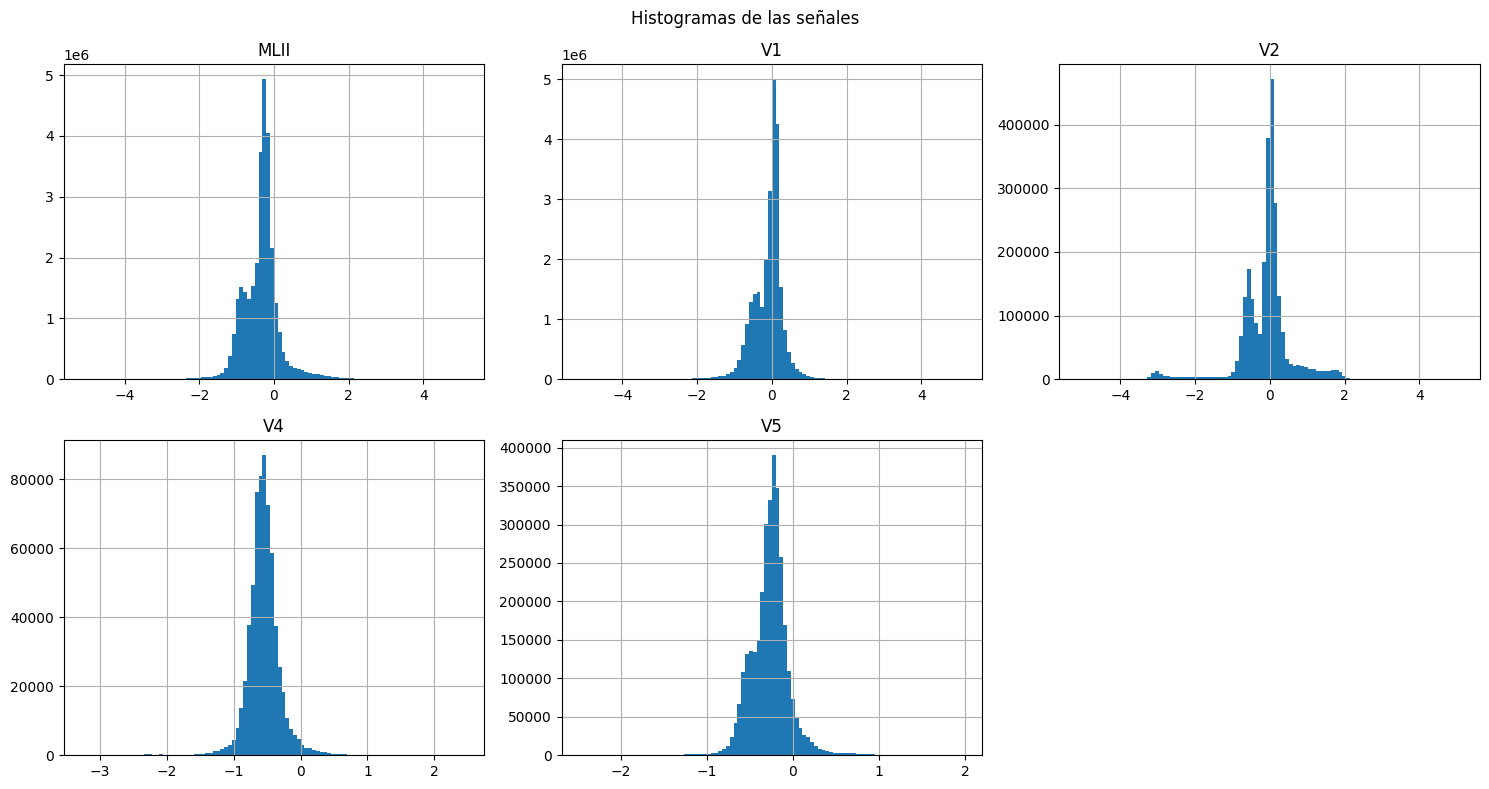

In [24]:

# Histogramas
df_final[columnas_presentes].hist(bins=100, figsize=(15, 8), layout=(2, 3))
plt.suptitle('Histogramas de las señales')
plt.tight_layout()
plt.show()



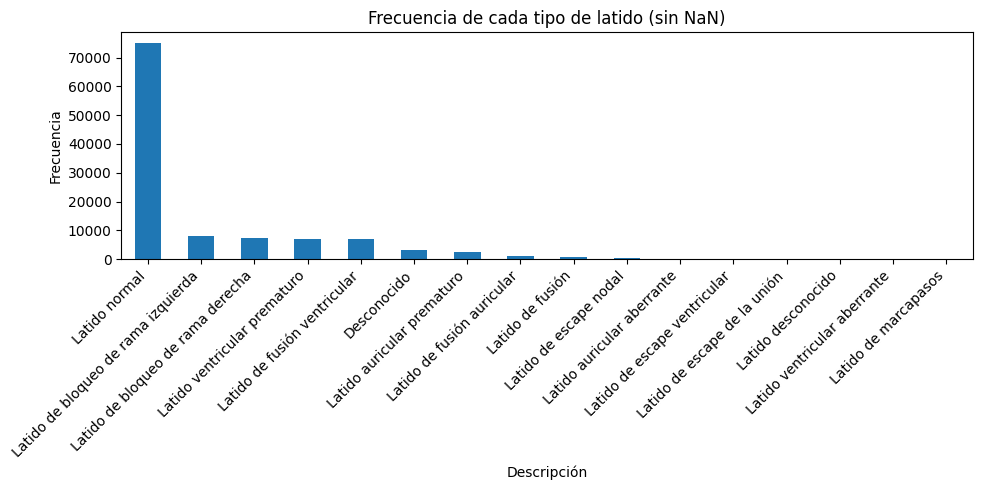

In [28]:
# Histograma de las descripciones (sin NaN)
import matplotlib.pyplot as plt

desc_counts = df_final['Descripción'].value_counts(dropna=True)
plt.figure(figsize=(10, 5))
desc_counts.plot(kind='bar')
plt.title('Frecuencia de cada tipo de latido (sin NaN)')
plt.xlabel('Descripción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

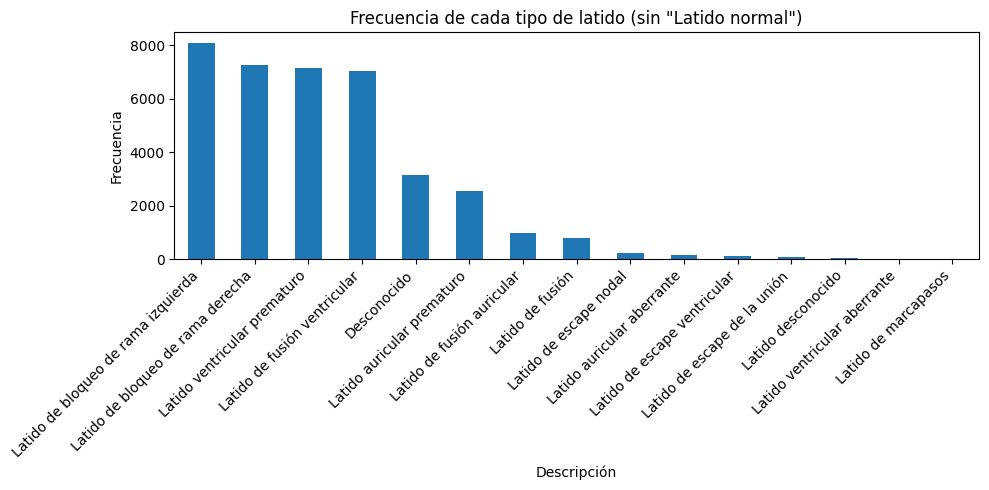

In [29]:
# Gráfico de frecuencias de tipos de latido, excluyendo "Latido normal"
desc_sin_normal = desc_counts.drop('Latido normal', errors='ignore')
plt.figure(figsize=(10, 5))
desc_sin_normal.plot(kind='bar')
plt.title('Frecuencia de cada tipo de latido (sin "Latido normal")')
plt.xlabel('Descripción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

,Sample,Símbolo,Descripción
0,52,+,Desconocido
1,135,N,Latido normal
1303,304523,J,Latido de escape de la unión
1587,369391,V,Latido ventricular prematuro


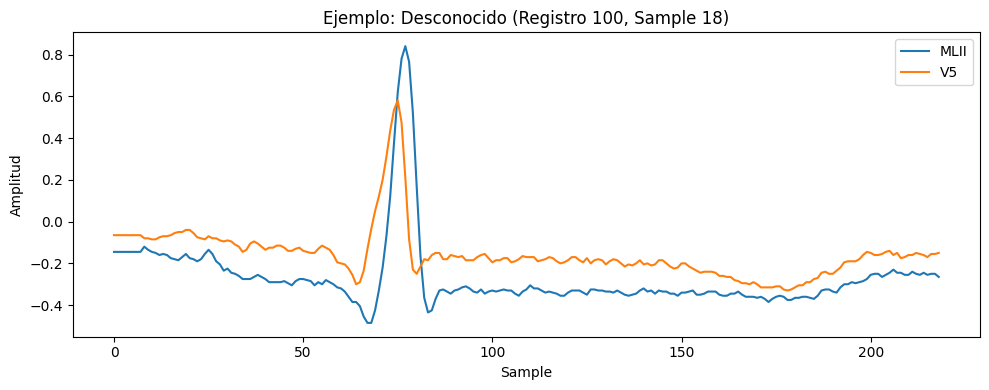

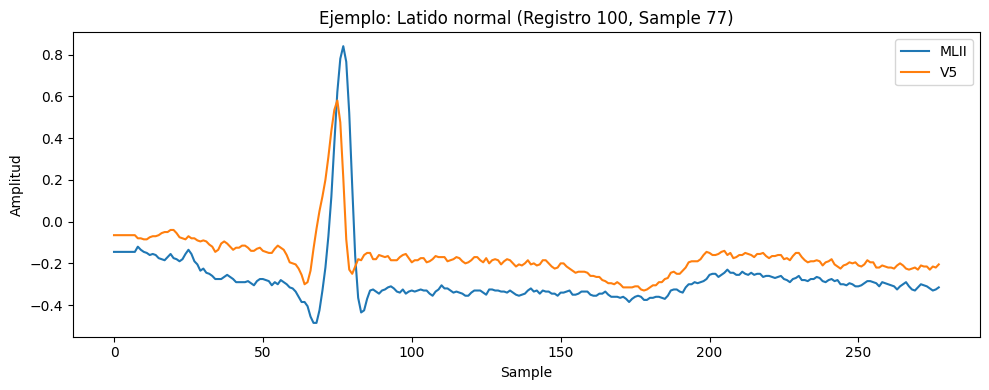

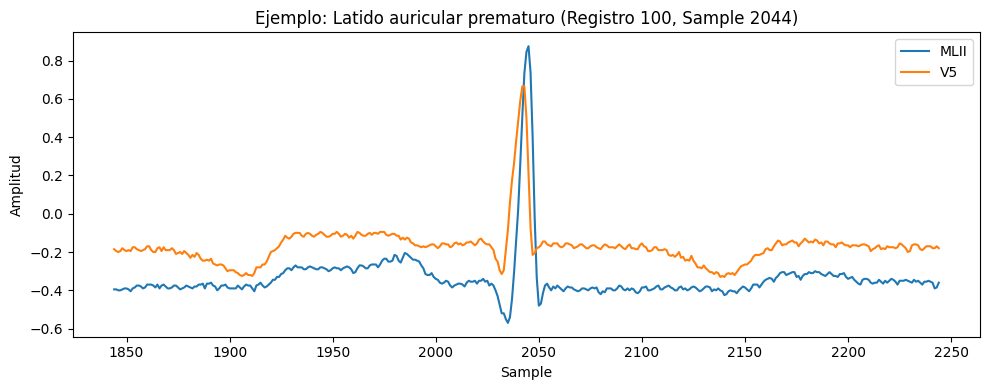

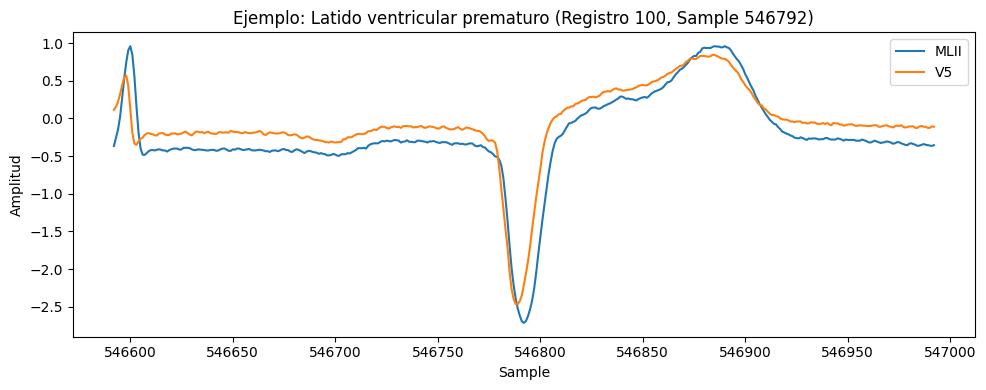

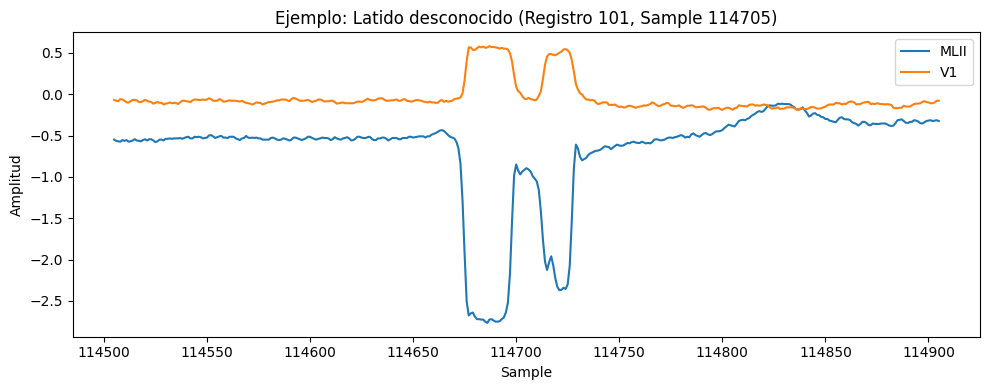

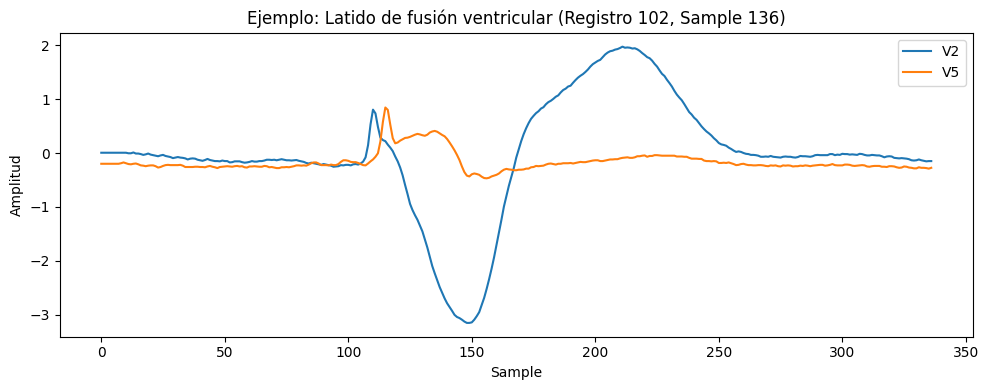

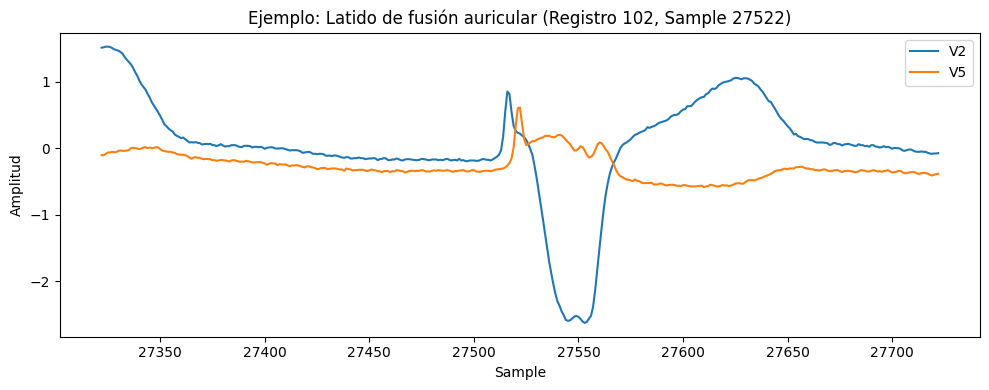

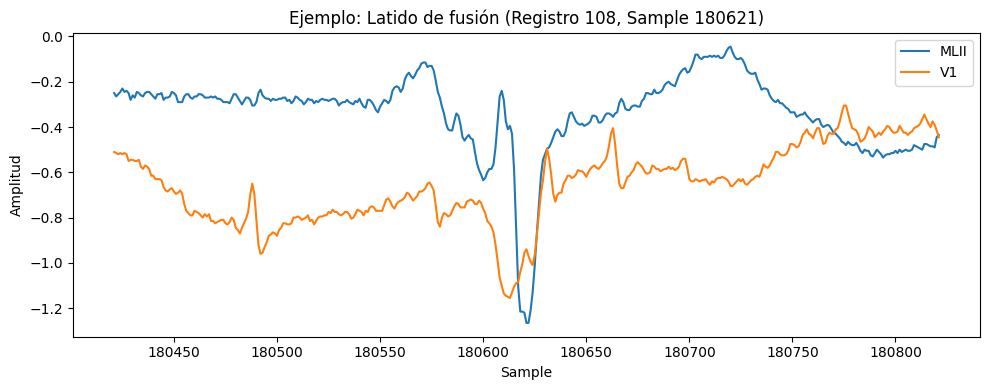

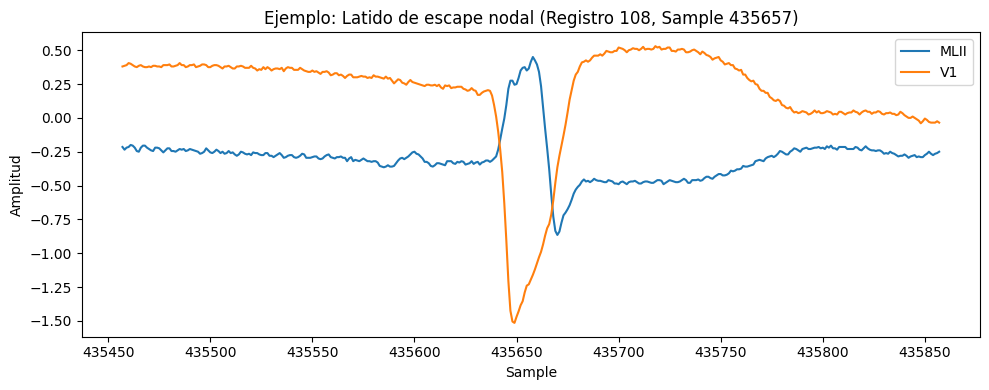

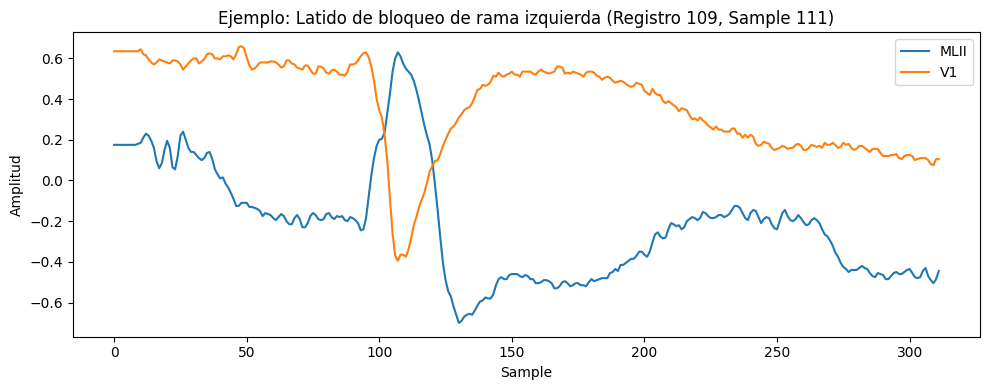

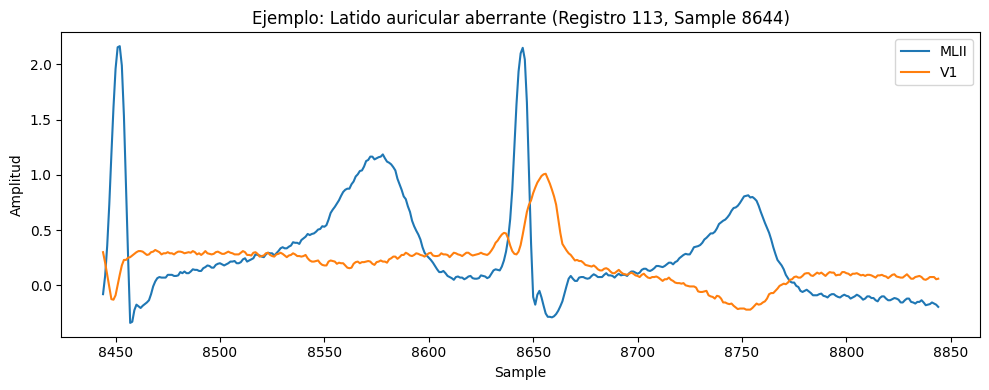

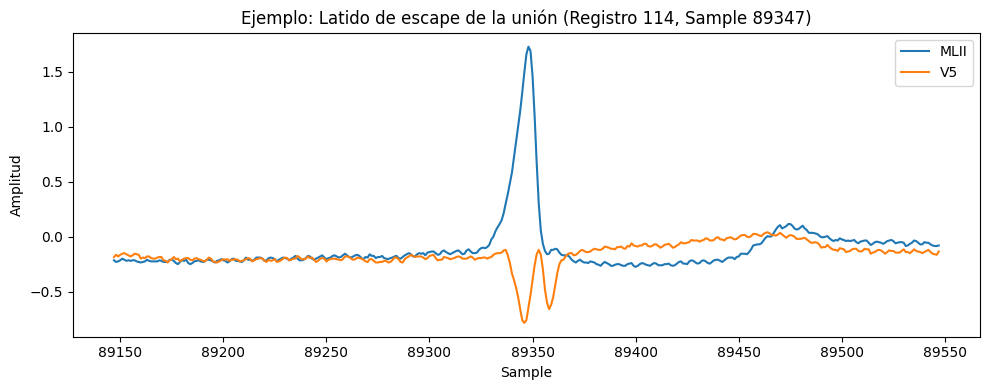

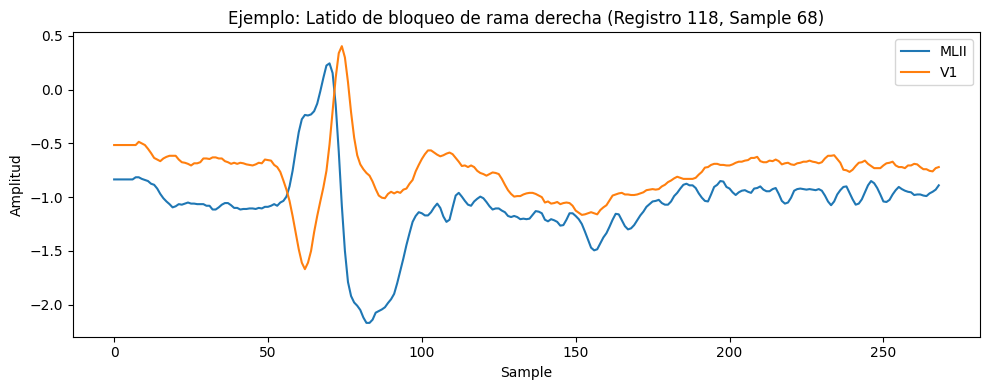

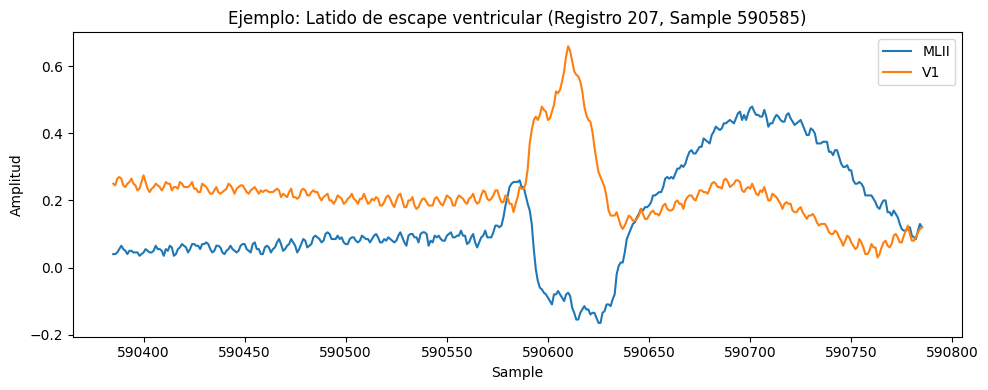

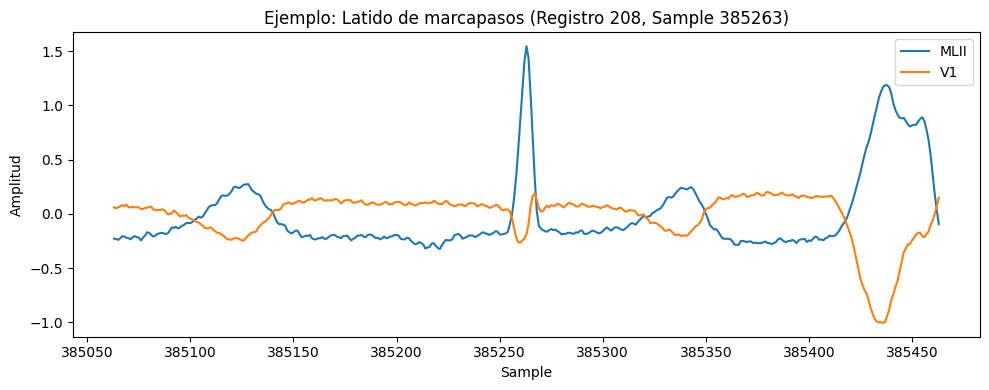

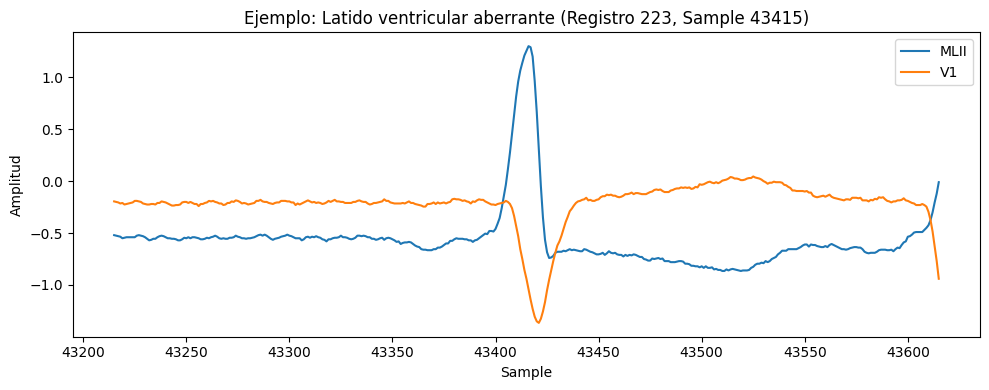

In [37]:
# Seleccionar un ejemplo de cada tipo de descripción (latido)
ejemplos = []
for desc in df_final['Descripción'].unique():
    filtro = df_final[df_final['Descripción'] == desc]
    if not filtro.empty:
        fila = filtro.iloc[0]
        ejemplos.append(fila)

ejemplos_df = pd.DataFrame(ejemplos)

# Graficar las señales alrededor de cada ejemplo (por defecto, MLII y V5 si existen)
import matplotlib.pyplot as plt

ventana = 200  # muestras antes y después del latido
for _, fila in ejemplos_df.iterrows():
    sample = fila['Sample']
    desc = fila['Descripción']
    registro = fila['Registro']  # Usar el registro correspondiente al ejemplo
    # Extraer segmento de df_final para ese registro y sample
    segmento = df_final[(df_final['Registro'] == registro) &
                        (df_final['Sample'] >= sample - ventana) &
                        (df_final['Sample'] <= sample + ventana)]
    plt.figure(figsize=(10, 4))
    for col in ['MLII', 'V1', 'V2', 'V4', 'V5']:
        if col in segmento.columns and segmento[col].notnull().any():
            plt.plot(segmento['Sample'], segmento[col], label=col)
    plt.title(f"Ejemplo: {desc} (Registro {registro}, Sample {sample})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31200000 entries, 0 to 31199999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   MLII         float64
 1   V5           float64
 2   Sample       int64  
 3   Símbolo      object 
 4   Descripción  object 
 5   Registro     object 
 6   V1           float64
 7   V2           float64
 8   V4           float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.1+ GB


In [40]:
df_final.describe()

,MLII,V5,Sample,V1,V2,V4
count,2.990000e+07,3.250000e+06,3.120000e+07,2.600000e+07,2.600000e+06,650000.000000
mean,-3.381972e-01,-2.638823e-01,3.249995e+05,-9.931229e-02,-9.068943e-02,-0.551911
std,4.853045e-01,2.279557e-01,1.876388e+05,4.150911e-01,7.297128e-01,0.261464
min,-5.120000e+00,-2.465000e+00,0.000000e+00,-5.120000e+00,-5.120000e+00,-3.260000
25%,-6.050000e-01,-3.850000e-01,1.624998e+05,-3.250000e-01,-4.050000e-01,-0.675000
50%,-3.000000e-01,-2.550000e-01,3.249995e+05,-5.000000e-03,-1.500000e-02,-0.560000
75%,-1.350000e-01,-1.550000e-01,4.874992e+05,1.250000e-01,1.300000e-01,-0.440000
max,5.115000e+00,1.975000e+00,6.499990e+05,5.115000e+00,5.115000e+00,2.460000


In [42]:
# Calcular la matriz de correlación y covarianza para las columnas numéricas presentes
corr_matrix = df_final[columnas_presentes].corr()
cov_matrix = df_final[columnas_presentes].cov()

print("Matriz de correlación:")
print(corr_matrix)
print("\nMatriz de covarianza:")
print(cov_matrix)

Matriz de correlación:
          MLII        V1        V2        V4        V5
MLII  1.000000  0.231375  0.538342  0.455141  0.718297
V1    0.231375  1.000000       NaN       NaN       NaN
V2    0.538342       NaN  1.000000       NaN -0.003073
V4    0.455141       NaN       NaN  1.000000       NaN
V5    0.718297       NaN -0.003073       NaN  1.000000

Matriz de covarianza:
          MLII        V1        V2        V4        V5
MLII  0.235520  0.046321  0.134698  0.054961  0.076077
V1    0.046321  0.172301       NaN       NaN       NaN
V2    0.134698       NaN  0.532481       NaN -0.000562
V4    0.054961       NaN       NaN  0.068363       NaN
V5    0.076077       NaN -0.000562       NaN  0.051964


In [44]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


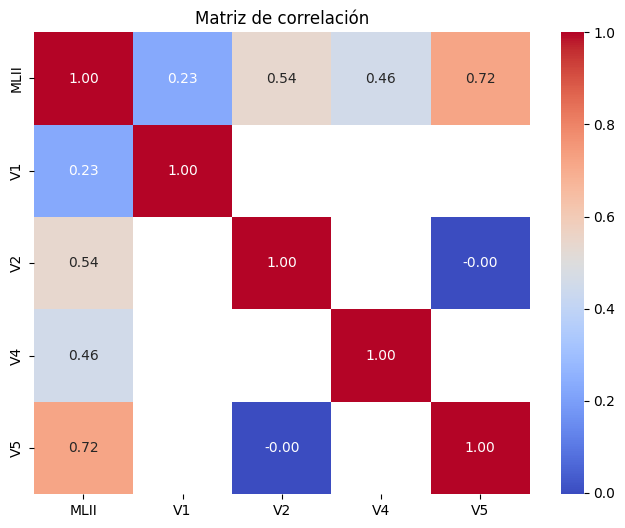

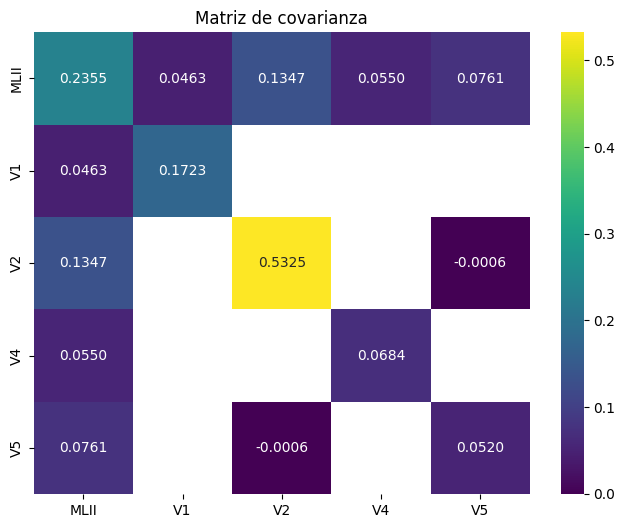

In [45]:
import seaborn as sns

import matplotlib.pyplot as plt

# Gráfica de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

# Gráfica de la matriz de covarianza
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='viridis', fmt=".4f")
plt.title('Matriz de covarianza')
plt.show()

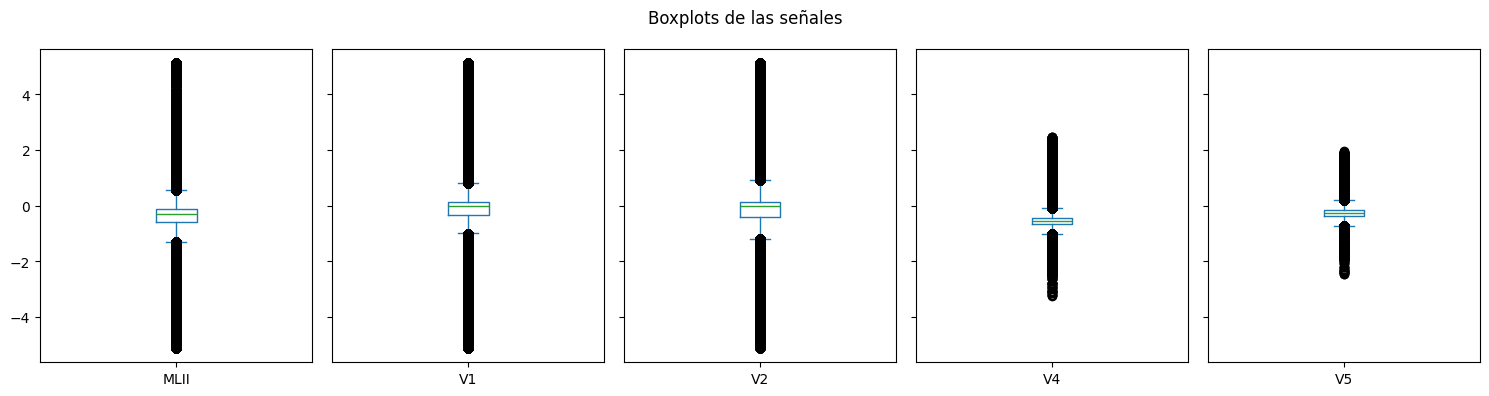

In [25]:
# Boxplots
df_final[columnas_presentes].plot(kind='box', subplots=True, layout=(1, len(columnas_presentes)), figsize=(15, 4), sharey=True)
plt.suptitle('Boxplots de las señales')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

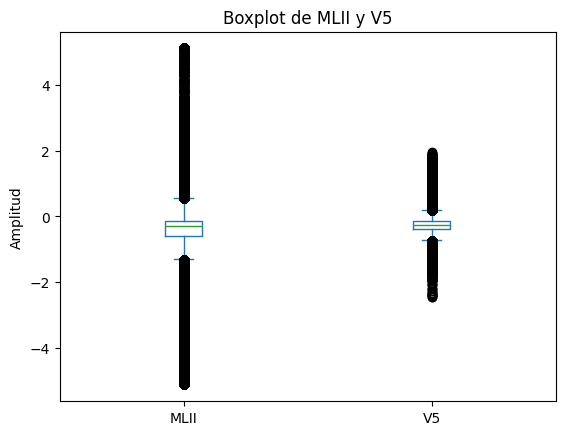

In [60]:
plt.figure(figsize=(8, 6))
df_final[['MLII', 'V5']].plot(kind='box')
plt.title('Boxplot de MLII y V5')
plt.ylabel('Amplitud')
plt.show()

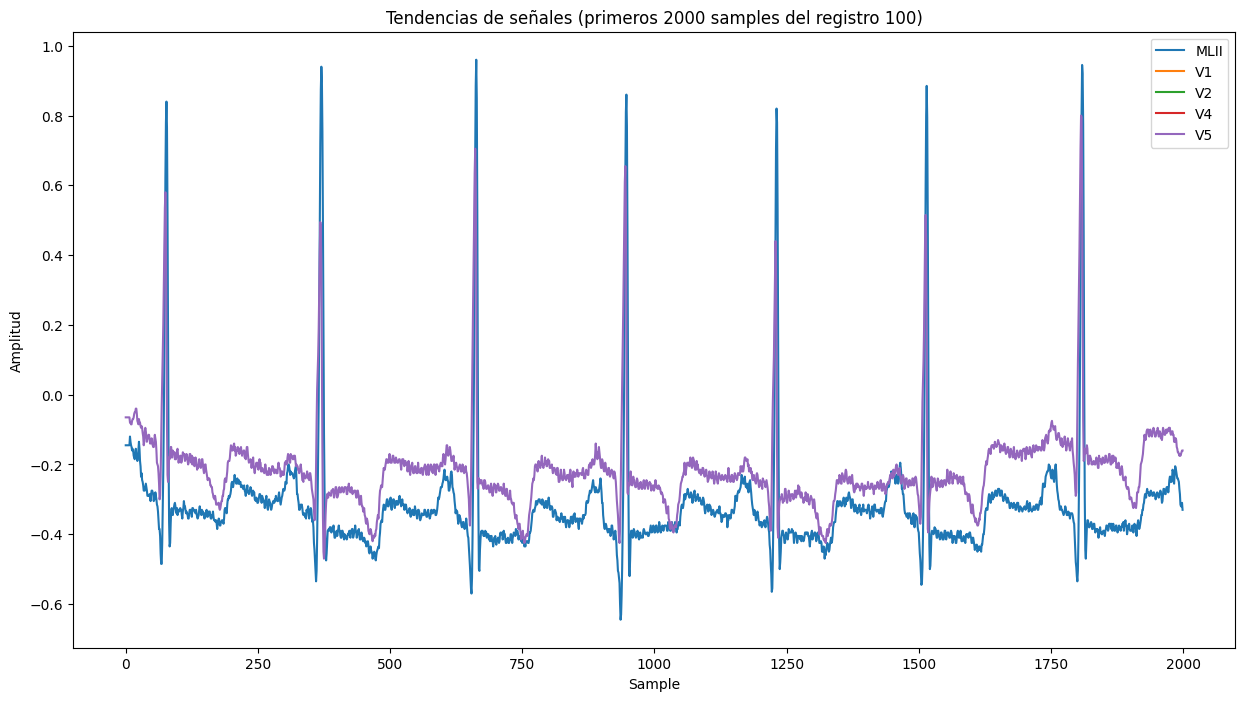

In [26]:
# Gráfico de líneas de una muestra de cada señal para observar tendencias
muestra = df_final[df_final['Registro'] == '100'].head(2000)  # Selecciona los primeros 2000 samples del registro 100

plt.figure(figsize=(15, 8))
for col in columnas_presentes:
    if col in muestra.columns:
        plt.plot(muestra['Sample'], muestra[col], label=col)
plt.xlabel('Sample')
plt.ylabel('Amplitud')
plt.title('Tendencias de señales (primeros 2000 samples del registro 100)')
plt.legend()
plt.show()

c:\Users\pevv2\OneDrive\Documentos\TCD\versionProyecto\DataWra\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\pevv2\OneDrive\Documentos\TCD\versionProyecto\DataWra\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


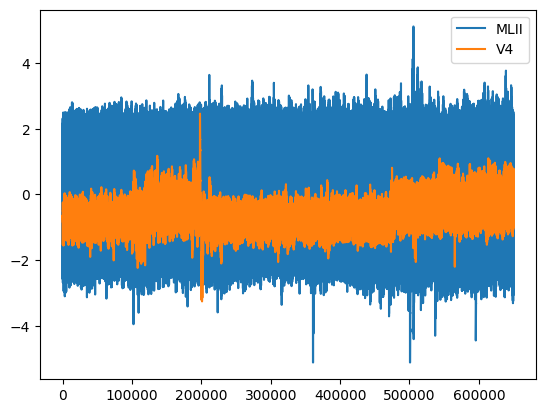

In [61]:
plt.plot(df_final['Sample'], df_final['MLII'], label='MLII')
plt.plot(df_final['Sample'], df_final['V4'], label='V4')
plt.legend()

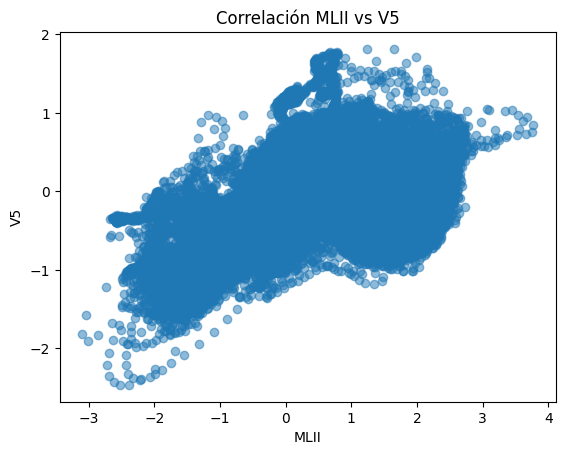

In [62]:
import matplotlib.pyplot as plt
plt.scatter(df_final['MLII'], df_final['V5'], alpha=0.5)
plt.xlabel('MLII')
plt.ylabel('V5')
plt.title('Correlación MLII vs V5')
plt.show()

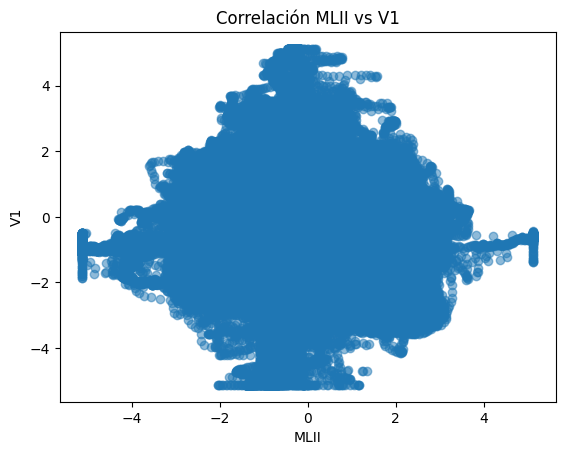

In [69]:
import matplotlib.pyplot as plt
plt.scatter(df_final['MLII'], df_final['V1'], alpha=0.5)
plt.xlabel('MLII')
plt.ylabel('V1')
plt.title('Correlación MLII vs V1')
plt.show()

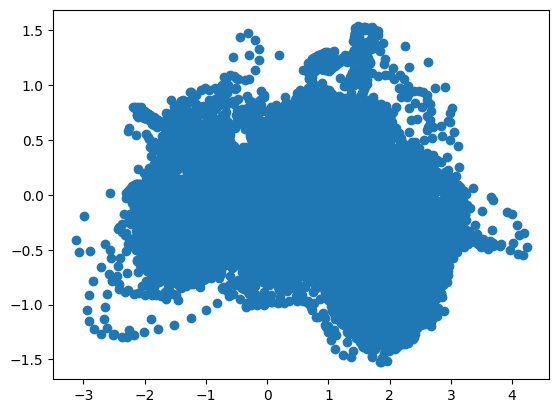

In [68]:
from sklearn.decomposition import PCA

# Eliminar filas con NaN en las columnas usadas para PCA
pca_data = df_final[['MLII',  'V5']].dropna()

pca = PCA(n_components=2)
df_pca = pca.fit_transform(pca_data)
plt.scatter(df_pca[:, 0], df_pca[:, 1])

In [67]:
pca_data

,MLII,V1,V2,V4,V5


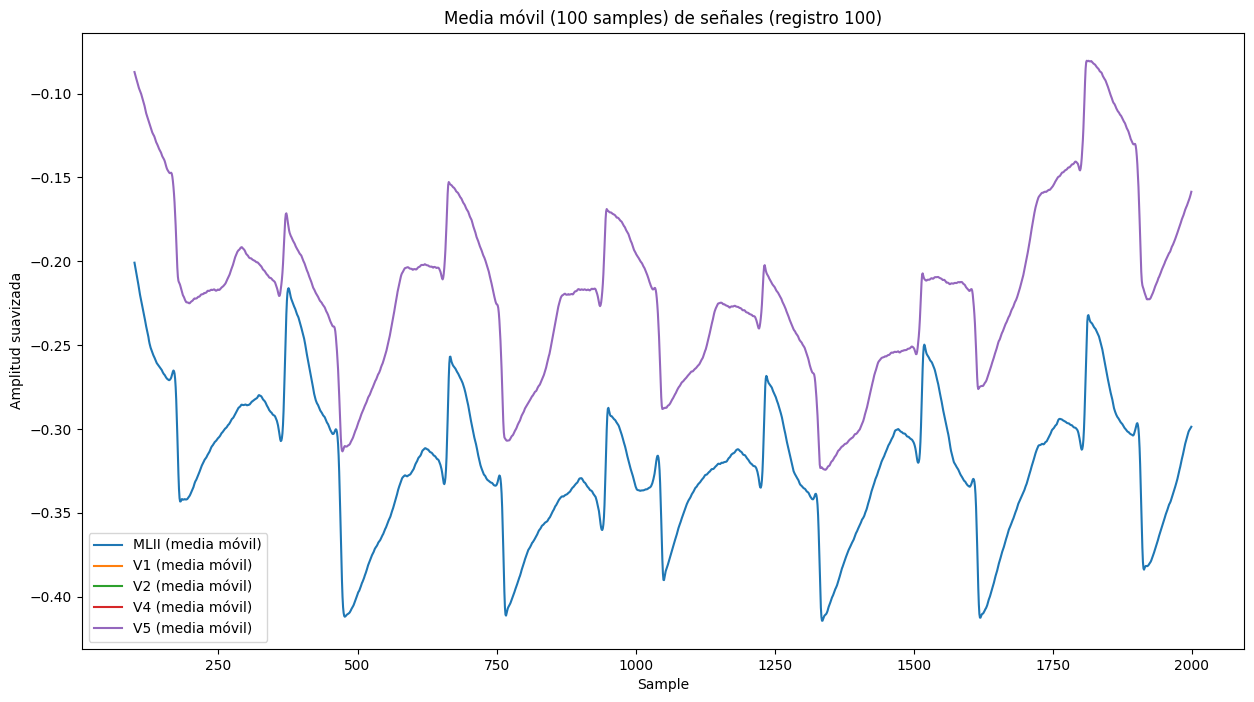

In [27]:
# Gráficos adicionales para detectar tendencias en las señales



# Gráfico de medias móviles para suavizar y ver tendencias generales
window = 100
plt.figure(figsize=(15, 8))
for col in columnas_presentes:
    if col in muestra.columns:
        plt.plot(muestra['Sample'], muestra[col].rolling(window).mean(), label=f'{col} (media móvil)')
plt.xlabel('Sample')
plt.ylabel('Amplitud suavizada')
plt.title(f'Media móvil ({window} samples) de señales (registro 100)')
plt.legend()
plt.show()

In [21]:
frecuencias_descripcion = df_final['Descripción'].value_counts(dropna=False)
print(frecuencias_descripcion)

Descripción
NaN                                    31087353
Latido normal                             75052
Latido de bloqueo de rama izquierda        8075
Latido de bloqueo de rama derecha          7259
Latido ventricular prematuro               7130
Latido de fusión ventricular               7028
Desconocido                                3153
Latido auricular prematuro                 2546
Latido de fusión auricular                  982
Latido de fusión                            803
Latido de escape nodal                      229
Latido auricular aberrante                  150
Latido de escape ventricular                106
Latido de escape de la unión                 83
Latido desconocido                           33
Latido ventricular aberrante                 16
Latido de marcapasos                          2
Name: count, dtype: int64


In [ ]:
# Detectar outliers usando el método del rango intercuartílico (IQR) para las columnas numéricas presentes
outliers = {}

for col in columnas_presentes:
    if col in df_final.columns:
        serie = df_final[col].dropna()
        Q1 = serie.quantile(0.25)
        Q3 = serie.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (serie < lower_bound) | (serie > upper_bound)
        outliers[col] = serie[outlier_mask]

# Mostrar cantidad de outliers por columna y algunos ejemplos
for col, vals in outliers.items():
    print(f"Columna: {col} - Outliers detectados: {len(vals)}")
    print(vals.head())

Columna: MLII - Outliers detectados: 1601418
75     0.620
76     0.780
77     0.840
78     0.765
368    0.720
Name: MLII, dtype: float64
Columna: V1 - Outliers detectados: 885765
3262629    0.810
3271203    0.850
3271204    0.885
3271205    0.860
3271206    0.815
Name: V1, dtype: float64
Columna: V2 - Outliers detectados: 257149
1300128   -1.240
1300129   -1.345
1300130   -1.455
1300131   -1.605
1300132   -1.755
Name: V2, dtype: float64
Columna: V4 - Outliers detectados: 37299
14300227   -1.065
14300228   -1.330
14300229   -1.495
14300230   -1.535
14300231   -1.455
Name: V4, dtype: float64
Columna: V5 - Outliers detectados: 132983
71    0.200
72    0.310
73    0.435
74    0.535
75    0.580
Name: V5, dtype: float64


Número total de latidos detectados: 2256
Número de outliers detectados: 7


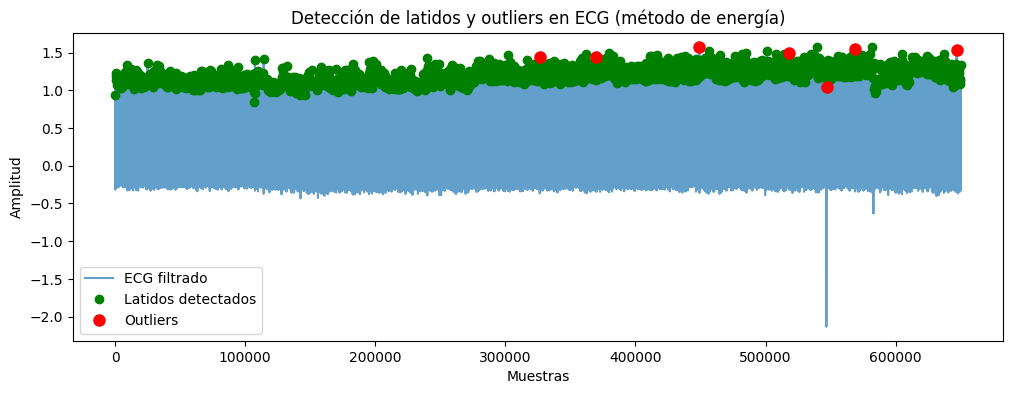

In [47]:
import wfdb
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, find_peaks
import matplotlib.pyplot as plt

# ----------------------
# 1. Cargar la señal
record = wfdb.rdrecord('100', pn_dir='mitdb')
ecg_signal = record.p_signal[:, 0]  # Canal MLII, típicamente el más representativo
fs = record.fs

# ----------------------
# 2. Filtro paso banda (0.5-45 Hz) para limpiar la señal
def bandpass_filter(signal, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    return y

filtered_ecg = bandpass_filter(ecg_signal, 0.5, 45, fs)

# ----------------------
# 3. Detección de picos (potenciales QRS)
peaks, _ = find_peaks(filtered_ecg, distance=fs*0.6, height=np.std(filtered_ecg)*1.2)

# ----------------------
# 4. Calcular energía (ventana de 100 ms alrededor de cada pico)
window_size = int(0.1 * fs)  # 100 ms
energies = []
for p in peaks:
    start = max(0, p - window_size // 2)
    end = min(len(filtered_ecg), p + window_size // 2)
    window = filtered_ecg[start:end]
    energy = np.sum(window ** 2)
    energies.append(energy)

energies = np.array(energies)

# ----------------------
# 5. Detectar outliers por energía (umbral típico: fuera de 3*IQR)
q1 = np.percentile(energies, 25)
q3 = np.percentile(energies, 75)
iqr = q3 - q1
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

outlier_indices = np.where((energies < lower_bound) | (energies > upper_bound))[0]

# ----------------------
# 6. Mostrar resultados
print(f"Número total de latidos detectados: {len(peaks)}")
print(f"Número de outliers detectados: {len(outlier_indices)}")

plt.figure(figsize=(12, 4))
plt.plot(filtered_ecg, label='ECG filtrado', alpha=0.7)
plt.plot(peaks, filtered_ecg[peaks], 'go', label='Latidos detectados')
plt.plot(peaks[outlier_indices], filtered_ecg[peaks[outlier_indices]], 'ro', label='Outliers', markersize=8)
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Detección de latidos y outliers en ECG (método de energía)')
plt.show()


In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31200000 entries, 0 to 31199999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   MLII         float64
 1   V5           float64
 2   Sample       int64  
 3   Símbolo      object 
 4   Descripción  object 
 5   Registro     object 
 6   V1           float64
 7   V2           float64
 8   V4           float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.1+ GB


   peak_sample    energy assigned_symbol  is_outlier
0           79  5.241654               N       False
1          372  8.751752               N       False
2          665  7.095146               N       False
3          949  6.715028               N       False
4         1233  5.492249               N       False
5         1517  6.171438               N       False
6         1811  7.258892               N       False
7         2046  6.676382               A       False
8         2404  7.712365               N       False
9         2708  6.882354               N       False

Outliers detectados con sus símbolos asignados:
      peak_sample     energy assigned_symbol  is_outlier
1143       326398  16.925067               N        True
1292       370012  16.749825               N        True
1561       449139  17.837799               N        True
1795       518130  17.987668               N        True
1892       546881  30.846534               V        True
1967       568921  18.2736

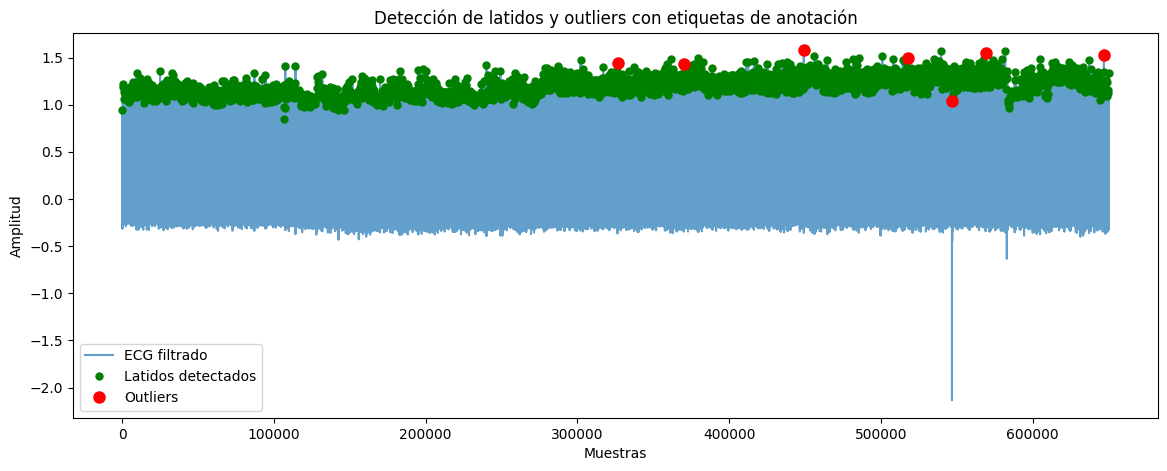

In [49]:
import wfdb
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, find_peaks
import matplotlib.pyplot as plt

# ----------------------
# 1. Cargar la señal y anotaciones
record = wfdb.rdrecord('100', pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

ecg_signal = record.p_signal[:, 0]  # Canal MLII
fs = record.fs

# ----------------------
# 2. Filtro paso banda
def bandpass_filter(signal, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    return y

filtered_ecg = bandpass_filter(ecg_signal, 0.5, 45, fs)

# ----------------------
# 3. Detectar picos QRS
peaks, _ = find_peaks(filtered_ecg, distance=int(0.6 * fs), height=np.std(filtered_ecg)*1.2)

# ----------------------
# 4. Calcular energía
window_size = int(0.1 * fs)
energies = []
for p in peaks:
    start = max(0, p - window_size // 2)
    end = min(len(filtered_ecg), p + window_size // 2)
    window = filtered_ecg[start:end]
    energy = np.sum(window ** 2)
    energies.append(energy)

energies = np.array(energies)

# ----------------------
# 5. Detección de outliers por energía
q1 = np.percentile(energies, 25)
q3 = np.percentile(energies, 75)
iqr = q3 - q1
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

outlier_indices = np.where((energies < lower_bound) | (energies > upper_bound))[0]

# ----------------------
# 6. Asignar etiquetas a los latidos detectados
# Convertimos las anotaciones en un DataFrame
ann_df = pd.DataFrame({
    'sample': annotation.sample,
    'symbol': annotation.symbol
})

# Usamos la distancia mínima en muestras para asignar cada latido detectado a la anotación más cercana
assigned_labels = []
for p in peaks:
    idx = np.argmin(np.abs(ann_df['sample'] - p))
    assigned_labels.append(ann_df.iloc[idx]['symbol'])

# ----------------------
# 7. Crear DataFrame final
df_latidos = pd.DataFrame({
    'peak_sample': peaks,
    'energy': energies,
    'assigned_symbol': assigned_labels
})

# Marcar los outliers
df_latidos['is_outlier'] = False
df_latidos.loc[outlier_indices, 'is_outlier'] = True

# ----------------------
# 8. Mostrar resultados
print(df_latidos.head(10))
print("\nOutliers detectados con sus símbolos asignados:")
print(df_latidos[df_latidos['is_outlier']])

# ----------------------
# 9. Visualización
plt.figure(figsize=(14, 5))
plt.plot(filtered_ecg, label='ECG filtrado', alpha=0.7)
plt.plot(peaks, filtered_ecg[peaks], 'go', label='Latidos detectados', markersize=5)
plt.plot(peaks[outlier_indices], filtered_ecg[peaks[outlier_indices]], 'ro', label='Outliers', markersize=8)
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Detección de latidos y outliers con etiquetas de anotación')
plt.show()


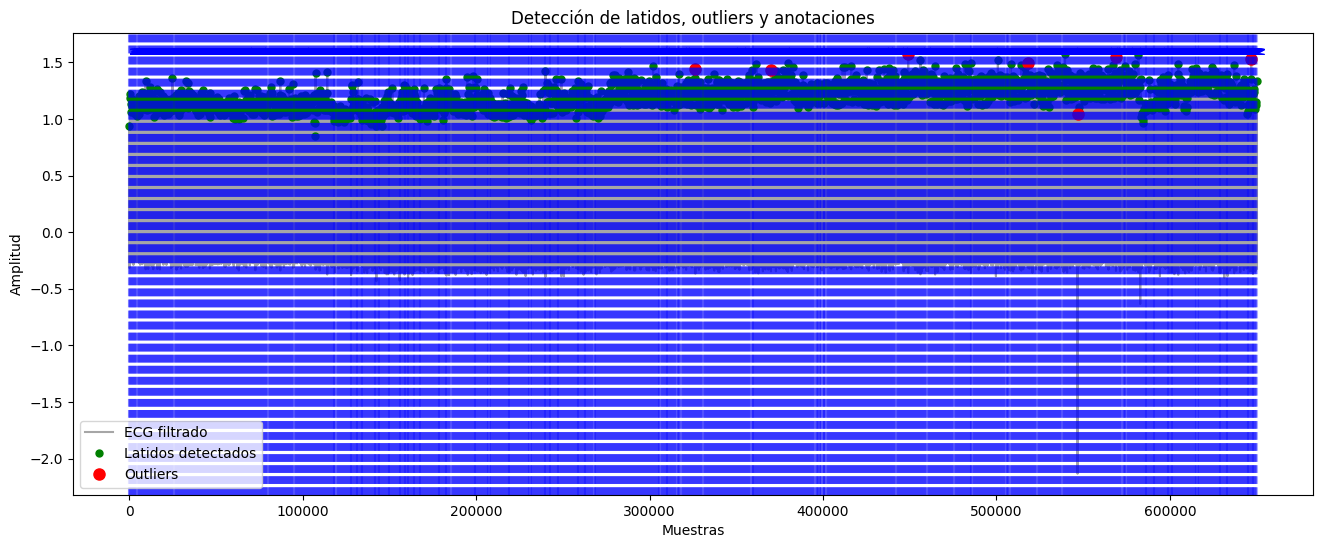

In [50]:
import wfdb
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, find_peaks
import matplotlib.pyplot as plt

# ----------------------
# 1. Cargar la señal y anotaciones
record = wfdb.rdrecord('100', pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

ecg_signal = record.p_signal[:, 0]  # Canal MLII
fs = record.fs

# ----------------------
# 2. Filtro paso banda
def bandpass_filter(signal, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    return y

filtered_ecg = bandpass_filter(ecg_signal, 0.5, 45, fs)

# ----------------------
# 3. Detectar picos QRS
peaks, _ = find_peaks(filtered_ecg, distance=int(0.6 * fs), height=np.std(filtered_ecg)*1.2)

# ----------------------
# 4. Calcular energía
window_size = int(0.1 * fs)
energies = []
for p in peaks:
    start = max(0, p - window_size // 2)
    end = min(len(filtered_ecg), p + window_size // 2)
    window = filtered_ecg[start:end]
    energy = np.sum(window ** 2)
    energies.append(energy)

energies = np.array(energies)

# ----------------------
# 5. Detección de outliers
q1 = np.percentile(energies, 25)
q3 = np.percentile(energies, 75)
iqr = q3 - q1
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

outlier_indices = np.where((energies < lower_bound) | (energies > upper_bound))[0]

# ----------------------
# 6. Asignar etiquetas de anotación
ann_df = pd.DataFrame({
    'sample': annotation.sample,
    'symbol': annotation.symbol
})

assigned_labels = []
for p in peaks:
    idx = np.argmin(np.abs(ann_df['sample'] - p))
    assigned_labels.append(ann_df.iloc[idx]['symbol'])

# ----------------------
# 7. DataFrame final
df_latidos = pd.DataFrame({
    'peak_sample': peaks,
    'energy': energies,
    'assigned_symbol': assigned_labels
})
df_latidos['is_outlier'] = False
df_latidos.loc[outlier_indices, 'is_outlier'] = True

# ----------------------
# 8. Visualización
plt.figure(figsize=(16, 6))
plt.plot(filtered_ecg, label='ECG filtrado', color='gray', alpha=0.7)

# Latidos detectados
plt.plot(peaks, filtered_ecg[peaks], 'go', label='Latidos detectados', markersize=5)

# Outliers
plt.plot(peaks[outlier_indices], filtered_ecg[peaks[outlier_indices]], 'ro', label='Outliers', markersize=8)

# Anotaciones (símbolos) en la señal
for idx, row in ann_df.iterrows():
    plt.axvline(x=row['sample'], color='blue', linestyle='--', alpha=0.3)
    plt.text(row['sample'], np.max(filtered_ecg), row['symbol'], color='blue', fontsize=8, rotation=90, verticalalignment='bottom')

plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Detección de latidos, outliers y anotaciones')
plt.show()


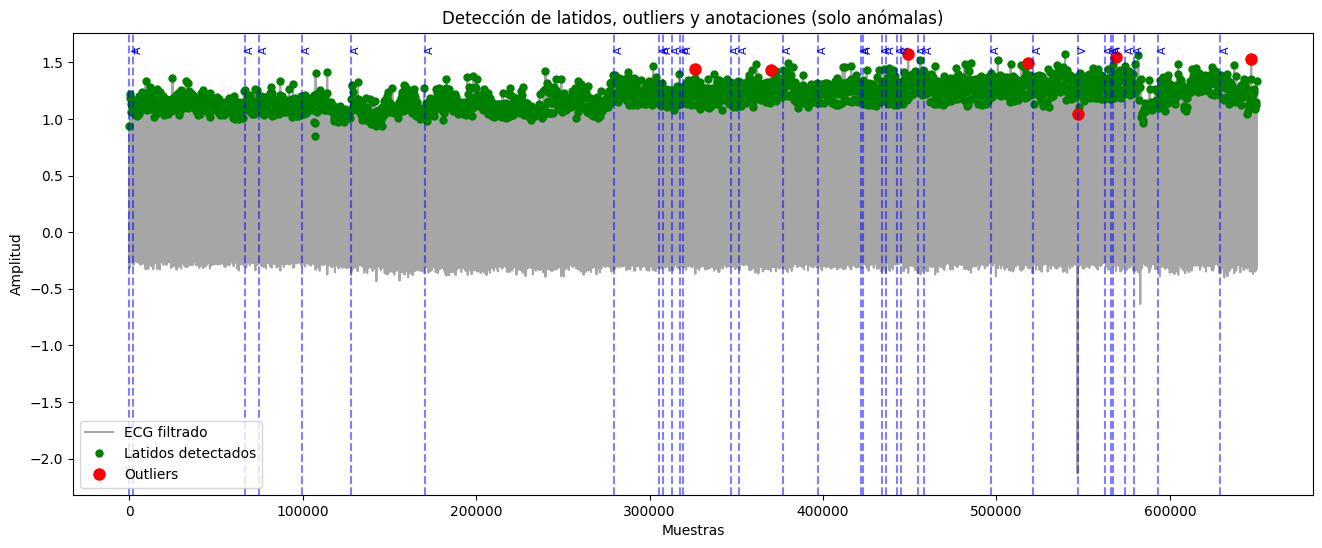

In [51]:
import wfdb
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, find_peaks
import matplotlib.pyplot as plt

# ----------------------
# 1. Cargar la señal y anotaciones
record = wfdb.rdrecord('100', pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

ecg_signal = record.p_signal[:, 0]  # Canal MLII
fs = record.fs

# ----------------------
# 2. Filtro paso banda
def bandpass_filter(signal, lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal)
    return y

filtered_ecg = bandpass_filter(ecg_signal, 0.5, 45, fs)

# ----------------------
# 3. Detectar picos QRS
peaks, _ = find_peaks(filtered_ecg, distance=int(0.6 * fs), height=np.std(filtered_ecg)*1.2)

# ----------------------
# 4. Calcular energía
window_size = int(0.1 * fs)
energies = []
for p in peaks:
    start = max(0, p - window_size // 2)
    end = min(len(filtered_ecg), p + window_size // 2)
    window = filtered_ecg[start:end]
    energy = np.sum(window ** 2)
    energies.append(energy)

energies = np.array(energies)

# ----------------------
# 5. Detección de outliers
q1 = np.percentile(energies, 25)
q3 = np.percentile(energies, 75)
iqr = q3 - q1
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

outlier_indices = np.where((energies < lower_bound) | (energies > upper_bound))[0]

# ----------------------
# 6. Asignar etiquetas de anotación
ann_df = pd.DataFrame({
    'sample': annotation.sample,
    'symbol': annotation.symbol
})

assigned_labels = []
for p in peaks:
    idx = np.argmin(np.abs(ann_df['sample'] - p))
    assigned_labels.append(ann_df.iloc[idx]['symbol'])

# ----------------------
# 7. DataFrame final
df_latidos = pd.DataFrame({
    'peak_sample': peaks,
    'energy': energies,
    'assigned_symbol': assigned_labels
})
df_latidos['is_outlier'] = False
df_latidos.loc[outlier_indices, 'is_outlier'] = True

# ----------------------
# 8. Visualización con anotaciones diferentes a 'N'
plt.figure(figsize=(16, 6))
plt.plot(filtered_ecg, label='ECG filtrado', color='gray', alpha=0.7)

# Latidos detectados
plt.plot(peaks, filtered_ecg[peaks], 'go', label='Latidos detectados', markersize=5)

# Outliers
plt.plot(peaks[outlier_indices], filtered_ecg[peaks[outlier_indices]], 'ro', label='Outliers', markersize=8)

# Anotaciones diferentes a 'N'
ann_df_noN = ann_df[ann_df['symbol'] != 'N']
for idx, row in ann_df_noN.iterrows():
    plt.axvline(x=row['sample'], color='blue', linestyle='--', alpha=0.5)
    plt.text(row['sample'], np.max(filtered_ecg), row['symbol'],
             color='blue', fontsize=8, rotation=90, verticalalignment='bottom')

plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Detección de latidos, outliers y anotaciones (solo anómalas)')
plt.show()


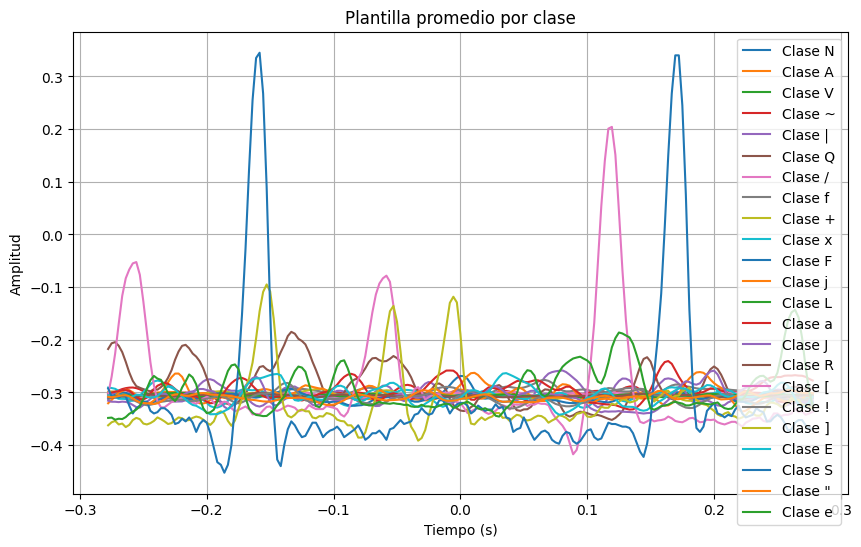

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Asumimos que tienes un DataFrame con columnas: 'Sample', 'MLII', 'Símbolo'

ventana = 100  # muestras antes y después
fs = 360  # frecuencia de muestreo típica en MIT-BIH

# Diccionario para guardar segmentos por clase
segmentos_por_clase = {}

# Filtrar solo los índices con anotación
anotados = df_final.dropna(subset=['Símbolo'])

for idx, row in anotados.iterrows():
    clase = row['Símbolo']
    sample = int(row['Sample'])
    start = sample - ventana
    end = sample + ventana
    
    if start < 0 or end >= len(df_final):
        continue  # ignorar bordes que no se pueden segmentar
    
    segmento = df_final.loc[start:end, 'MLII'].values
    segmentos_por_clase.setdefault(clase, []).append(segmento)

# Calcular plantilla promedio para cada clase
plantillas = {clase: np.mean(np.array(segms), axis=0) for clase, segms in segmentos_por_clase.items()}

# Graficar plantillas
plt.figure(figsize=(10, 6))
for clase, plantilla in plantillas.items():
    plt.plot(np.arange(-ventana, ventana+1)/fs, plantilla, label=f'Clase {clase}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Plantilla promedio por clase')
plt.legend()
plt.grid()
plt.show()


4 clases más frecuentes: [('N', 75041), ('L', 8074), ('R', 7257), ('V', 7129)]


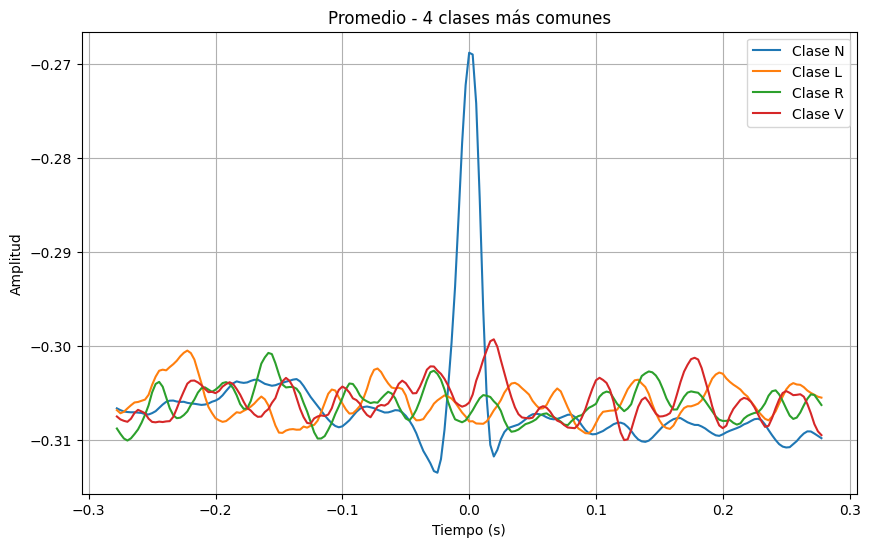

In [ ]:
import collections

conteo_clases = {clase: len(segms) for clase, segms in segmentos_por_clase.items()}
clases_mas_comunes = sorted(conteo_clases.items(), key=lambda x: x[1], reverse=True)[:4]
print("4 clases más frecuentes:", clases_mas_comunes)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for clase, _ in clases_mas_comunes:
    plantilla = plantillas[clase]
    plt.plot(np.arange(-ventana, ventana+1)/fs, plantilla, label=f'Clase {clase}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Promedio - 4 clases más comunes')
plt.legend()
plt.grid()
plt.show()
